<h1 style="text-align: center;color:blue"><em>Daniel Juravski 206082323</em></h1>

## Preparing the data:
1. load data form file
2. remove the $id$ column
3. remove the $diagnosis$ column, convert it's value to binary value and define it as a target
4. split to train-test data

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
data = pd.read_csv('../data/breast-cancer-wisconsin-data/data.csv')
data = data.drop(columns='id')
data = pd.get_dummies(data, columns=['diagnosis'], drop_first=True)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [28]:
target = data['diagnosis_M']
data = data.drop(columns='diagnosis_M')

data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
train_x, test_x, train_y, test_y = train_test_split(data, target, stratify=target, random_state=0)
print('train size: {}'.format(train_x.shape))
print('test size: {}'.format(test_x.shape))
print('train counts:\n{}'.format(train_y.value_counts()))
print('test counts:\n{}'.format(test_y.value_counts()))

train size: (426, 30)
test size: (143, 30)
train counts:
0    267
1    159
Name: diagnosis_M, dtype: int64
test counts:
0    90
1    53
Name: diagnosis_M, dtype: int64


## Question 01:

In [39]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from IPython.display import display, HTML

parameters = {'n_estimators': (10, 20, 50, 100, 200, 500),
              'max_depth': (2, 3, 4, 5, 6, 7, 8)}

clf = ensemble.RandomForestClassifier(random_state=1)
classifiers = GridSearchCV(clf, parameters, scoring='accuracy', return_train_score=True)
classifiers.fit(train_x, train_y)

train_process_results = pd.DataFrame(list(zip(classifiers.cv_results_['params'],
                                              classifiers.cv_results_['mean_train_score'],
                                              classifiers.cv_results_['mean_test_score'])),
                                     columns=["Parameter", "mean train score", "mean validation score"])
display(HTML(train_process_results.to_html()))

print("Best params: {0}".format(classifiers.best_params_))
best_rf = classifiers.best_estimator_

y_pred = best_rf.score(train_x, train_y)
y_test_pred = best_rf.score(test_x, test_y)
print("Train data acc: {0}".format(y_pred))
print("Test data acc: {0}".format(y_test_pred))



,Parameter,mean train score,mean validation score
0,"{'max_depth': 2, 'n_estimators': 10}",0.959515,0.924815
1,"{'max_depth': 2, 'n_estimators': 20}",0.960685,0.938933
2,"{'max_depth': 2, 'n_estimators': 50}",0.964792,0.943639
3,"{'max_depth': 2, 'n_estimators': 100}",0.967728,0.943639
4,"{'max_depth': 2, 'n_estimators': 200}",0.965963,0.948345
5,"{'max_depth': 2, 'n_estimators': 500}",0.966550,0.945992
6,"{'max_depth': 3, 'n_estimators': 10}",0.974773,0.936607
7,"{'max_depth': 3, 'n_estimators': 20}",0.981225,0.943639
8,"{'max_depth': 3, 'n_estimators': 50}",0.984744,0.943639
9,"{'max_depth': 3, 'n_estimators': 100}",0.988266,0.957756


Best params: {'max_depth': 3, 'n_estimators': 100}
Train data acc: 0.9882629107981221
Test data acc: 0.958041958041958


## Question 02:

From the table above, we can see that there are some many more candidate values for the 'max_depth' and 'n_estimators' params that achieve promising accuracy results both for the train and validation folds.

That will be interesting to try fitting the model over another folds and explore than the best params, we'll do that with initializing a new `RandomForestClassifier` with `random_state=2` and a new `GridSearchCV` object.

In [40]:
clf = ensemble.RandomForestClassifier(random_state=2)
classifiers = GridSearchCV(clf, parameters, scoring='accuracy', return_train_score=True)
classifiers.fit(train_x, train_y)

train_process_results = pd.DataFrame(list(zip(classifiers.cv_results_['params'],
                                              classifiers.cv_results_['mean_train_score'],
                                              classifiers.cv_results_['mean_test_score'])),
                                     columns=["Parameter", "mean train score", "mean validation score"])
display(HTML(train_process_results.to_html()))

print("Best params: {0}".format(classifiers.best_params_))
best_rf = classifiers.best_estimator_

y_pred = best_rf.score(train_x, train_y)
y_test_pred = best_rf.score(test_x, test_y)
print("Train data acc: {0}".format(y_pred))
print("Test data acc: {0}".format(y_test_pred))

,Parameter,mean train score,mean validation score
0,"{'max_depth': 2, 'n_estimators': 10}",0.962437,0.948317
1,"{'max_depth': 2, 'n_estimators': 20}",0.963612,0.948317
2,"{'max_depth': 2, 'n_estimators': 50}",0.964206,0.948345
3,"{'max_depth': 2, 'n_estimators': 100}",0.967142,0.945992
4,"{'max_depth': 2, 'n_estimators': 200}",0.964792,0.945992
5,"{'max_depth': 2, 'n_estimators': 500}",0.964204,0.948345
6,"{'max_depth': 3, 'n_estimators': 10}",0.980052,0.960082
7,"{'max_depth': 3, 'n_estimators': 20}",0.982396,0.953023
8,"{'max_depth': 3, 'n_estimators': 50}",0.985920,0.948345
9,"{'max_depth': 3, 'n_estimators': 100}",0.987093,0.953051


Best params: {'max_depth': 7, 'n_estimators': 20}
Train data acc: 0.9976525821596244
Test data acc: 0.965034965034965


As we assumed, a different random seed and a different CV fields resulted with a differet best params values, we will use them as our best estimator params values.

## Question 03:

In [73]:
import numpy as np

importances = best_rf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Top 5 important features:")

for i in range(5):
    print("%d. %s (%f)" % (i+1, train_x.columns.values[indices[i]], importances[indices[i]]))
most_important_feature = train_x.columns.values[indices[0]]

Top 5 important features:
1. concave points_worst (0.159228)
2. radius_worst (0.135593)
3. area_mean (0.127310)
4. concave points_mean (0.124358)
5. area_se (0.067199)


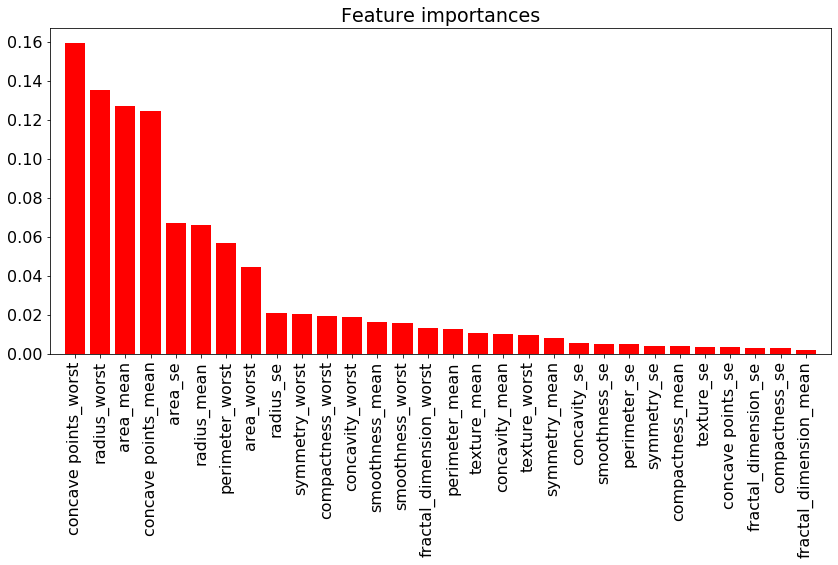

In [42]:
# Plot the impurity-based feature importances of the forest
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 6) 
plt.rcParams["font.size"] = 16
plt.rcParams["lines.linewidth"] = 2.5

plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(train_x.shape[1]), [train_x.columns.values[i] for i in indices], rotation=90)
plt.xlim([-1, train_x.shape[1]])
plt.show()

## Question 04:

In [43]:
import shap
import warnings
# ignore shap-l1_reg="auto" warnings
warnings.filterwarnings('ignore')

Using 143 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


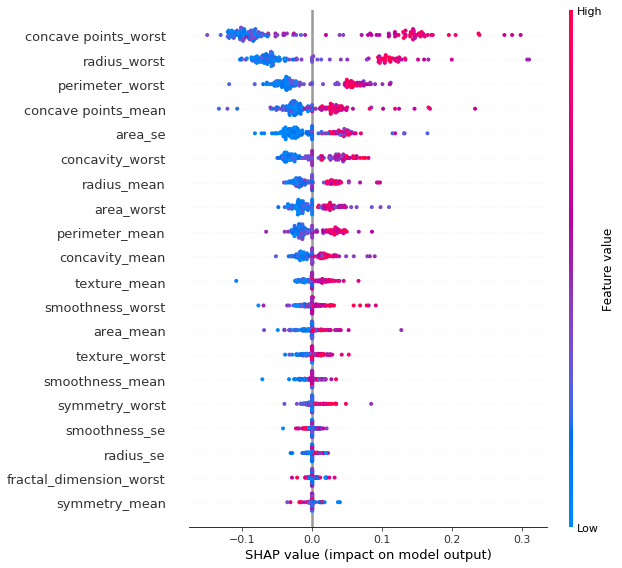

In [134]:
shap_values = shap.KernelExplainer(best_rf.predict, test_x).shap_values(test_x)
shap.summary_plot(shap_values, test_x)

In [135]:
kernel_shap_values = shap_values
shap_sum = np.abs(kernel_shap_values).mean(axis=0)
importance_df = pd.DataFrame([test_x.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
27,concave points_worst,0.108354
20,radius_worst,0.077766
22,perimeter_worst,0.0472853
7,concave points_mean,0.0361748
13,area_se,0.03537
26,concavity_worst,0.0324279
0,radius_mean,0.0223801
23,area_worst,0.0216882
2,perimeter_mean,0.0214683
6,concavity_mean,0.0165433


The top 5 most important features according to the KernelExplainer are:
1. concave points_worst
2. radius_worst
3. perimeter_worst
4. concave points_mean
5. area_se

That order make sense with the RandomForest important feature extracted above.

We can see that generally the features that the KernelExplainer model concluded (based on the test data), are as the features that were extracted from the original RandomForest model, more or less in a quite different order.
All (except ${perimeter\_worst}$) KernelExplainer top 5 features are presented at the top 5 trained important features.
The ${perimeter\_worst}$ feature is presented at the 7$^{th}$ place (in the top above trained important features), thus it is still acceptable to see it in the top 5 list (in the KernelExplainer top 5 features).
On the other hand, the ${area\_mean}$ feature, that presented at the top 5 RandomForest importance list do not appear at the top 5 KernelExplainer importance list.

## Question 05:

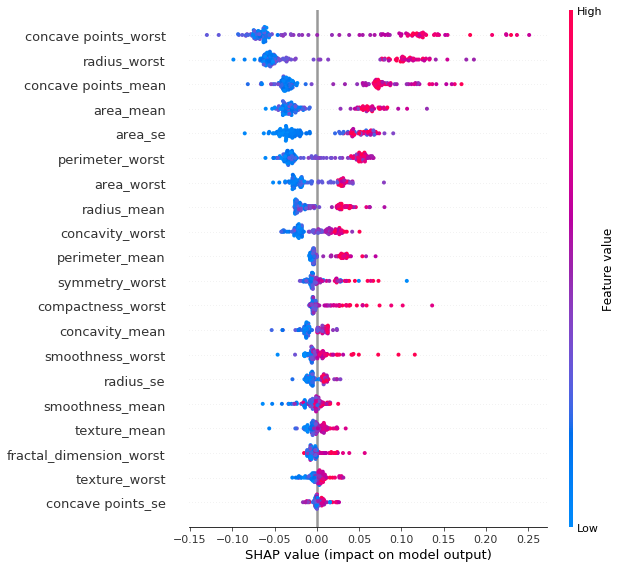

In [136]:
explainerModel = shap.TreeExplainer(best_rf)
shap_values = explainerModel.shap_values(test_x)[1]  # shap values of the 1-class
shap.summary_plot(shap_values, test_x, plot_type="dot")

In [137]:
tree_shap_values = shap_values
shap_sum = np.abs(tree_shap_values).mean(axis=0)
importance_df = pd.DataFrame([test_x.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
27,concave points_worst,0.0864165
20,radius_worst,0.070505
7,concave points_mean,0.0584766
3,area_mean,0.0421465
13,area_se,0.040788
22,perimeter_worst,0.0373886
23,area_worst,0.0255096
0,radius_mean,0.023133
26,concavity_worst,0.0191993
2,perimeter_mean,0.013596


The top 5 most important features according to the TreeExplainer (that indeed computes much faster than the above) are:
1. concave points_worst
2. radius_worst
3. concave points_mean
4. area_mean
5. area_se

That order make sense both with the RandomForest important features extracted above and the KernelExplainer important features.

We can see that generally the features that the TreeExplainer model concluded (based on the test data), are as the features that were extracted from the KernelExplainer model, more or less in a quite different order.
All (except ${area\_mean}$) features are presented at the KernelExplainer top 5 important features.
We can see that the ${perimeter\_worst}$ feature, that presented at the 3$^{rd}$ in the KernelExplainer importance list appears at the 6$^{th}$ place in the TreeExplainer importance list.


Overall, it seems that the important features that were extracted based on the test data - data that the model was never trained on, are very correlate both in the KernelExplainer and the TreeExplainer explainers. In addition they both very suitable to the original feature importance from the initial RandonForest model.

## Question 06:

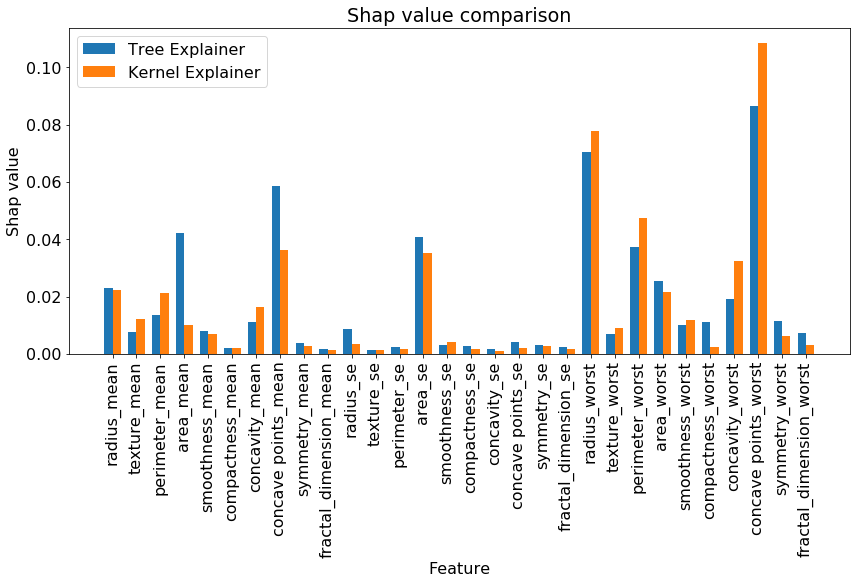

In [150]:
index = np.arange(30)
bar_width = 0.35

kernel_shap_values_mean = np.mean(np.abs(kernel_shap_values), axis=0)
tree_shap_values_mean = np.mean(np.abs(tree_shap_values), axis=0)

fig, ax = plt.subplots()
ax.bar(index, tree_shap_values_mean, bar_width, label="Tree Explainer")
ax.bar(index+bar_width, kernel_shap_values_mean, bar_width, label="Kernel Explainer")

ax.set_xlabel('Feature')
ax.set_ylabel('Shap value')
ax.set_title('Shap value comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(test_x.columns)
plt.xticks(rotation=90)
ax.legend()

plt.show()

Both explainers' Shapley mean values are presented above. We can see that the general trend is similar between both the graphs, i.e. both explainers have the same highest values and the same lowest values respectively.

## Question 07:

Let's find the sample that the most important feature shapley value is the highest.

In [124]:
# get the most important feature index
most_important_feature_idx = np.where(test_x.columns.values == most_important_feature)

sample_id = np.abs(shap_values.T[most_important_feature_idx]).argmax()
print("The sample that the most important feature is indeed the most important: {0}".format(sample_id))
print("The most important feature is: {0}".format(most_important_feature))

The sample that the most important feature is indeed the most important: 9
The most important feature is: concave points_worst


In [123]:
shap.initjs()

shap.force_plot(explainerModel.expected_value[1], shap_values[sample_id], test_x.iloc[[sample_id]])

## Question 08:

Let's find the sample that the most important feature shapley value is the lowest.

In [127]:
sample_id = np.abs(shap_values.T[most_important_feature_idx]).argmin()
print("The sample that the most important feature is the less important: {0}".format(sample_id))


_most_important_feature = test_x.columns[np.abs(shap_values[sample_id]).argmax()]
print("The most important feature is: {0}".format(_most_important_feature))

The sample that the most important feature is the less important: 59
The most important feature is: radius_worst


In [128]:
shap.force_plot(explainerModel.expected_value[1], shap_values[sample_id], test_x.iloc[[sample_id]])

We see that the most important feature in that sample (the one that the most global importane feature is the less local important) is $radius\_worst$. It makes sence since thus feature indeed in the top 5 global important feature list.